# How to simulate

The unique feature of structural models compared to other econometric models is the ability to provide counterfactuals. There exist three different ways to simulate counterfactuals with ``respy``. Ordered from no data to a panel data on individuals, there is:

1. *n-step-ahead simulation with sampling*: The first observation of an individual is sampled from the distribution implied by the initial conditions, i.e., the distribution of observed variables or initial experiences, etc. in the first period. Then, the individuals are guided for $n$ periods by the decision rules from the solution of the model.

2. *n-step-ahead simulation with data*: Take the first observation of each individual from the data and do as in 1..

3. *one-step-ahead simulation*: Take the complete data and find for each observation the corresponding outcomes, e.g, choices and wages, using the decision rules from the model solution.

You can find more information on initial conditions and how to express them with ``respy`` in [this tutorial](tutorial-initial-conditions.ipynb).

In this notebook, you will learn how to use all of the three methods and what their purpose is. We take the basic model from Keane and Wolpin (1997) and their original data.

We further restrict the model to 12 periods to reduce the complexity and runtime. Thus, the following simulations will differ from the real data a lot because the parameters belong to a model with fifty periods which distorts choice patterns for shorter time frames. We start by importing the model and data.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import respy as rp

params, options, df = rp.get_example_model("kw_97_basic")

options["n_periods"] = 11

## 1. n-step-ahead simulation with sampling

The first exercise is an *n-step-ahead simulation with sampling*. This method and the following *n-step-ahead simulation with data* are the cornerstone for providing predictions of behavior in counterfactural environments. Here, the first observation of each individual is sampled from the distribution implied by the initial conditions of the model. The initial conditions determine, for example, the distribution of observed variables, experiences, and previous choices.

In [2]:
simulate = rp.get_simulate_func(params, options, "n_step_ahead_with_sampling")

In [3]:
df_1 = simulate(params)

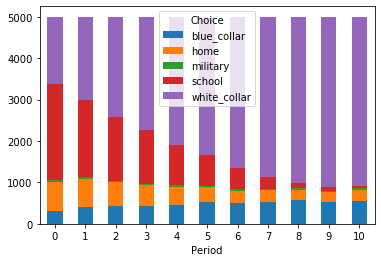

In [4]:
df_1.groupby("Period").Choice.value_counts().unstack().plot.bar(
    stacked=True, rot=0
)

## 2. n-step-ahead simulation with data

For the second variant of the n-step-ahead simulation, you do not need to specify, e.g., the distribution of initial experiences. Instead, the first observations in the data are taken as the starting points for the simulation. Thus, restrict the data to first period and pass it to the constructor for the simulation function.

This routine is especially useful if the policy simulation results should be very similar to sample or the distribution of characteristics in the first period is complex.

In [6]:
simulate = rp.get_simulate_func(params, options, "n_step_ahead_with_data", df)

In [7]:
df_2 = simulate(params)

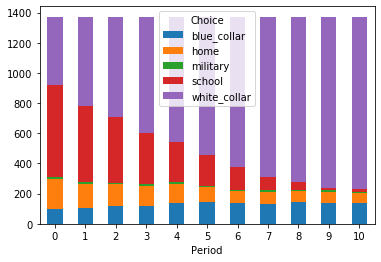

In [8]:
df_2.groupby("Period").Choice.value_counts().unstack().plot.bar(
    stacked=True, rot=0
)

## 3. one-step-ahead simulation

The one-step-ahead simulation takes the full dataset and simulates the outcomes for each observation. Thus, the original sample size is preserved. The results are used to measure the within-sample fit of the model.

In [9]:
simulate = rp.get_simulate_func(params, options, "one_step_ahead", df)

In [10]:
df_3 = simulate(params)

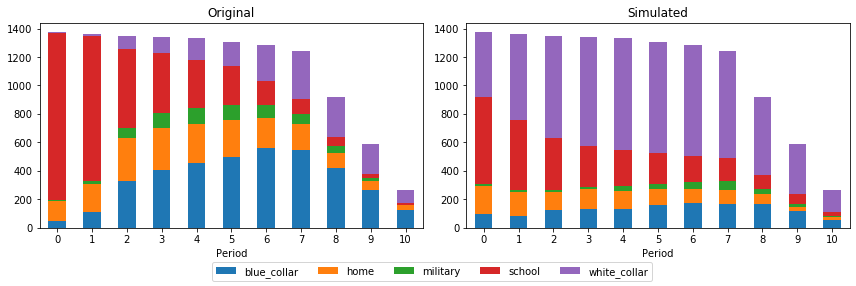

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

df.groupby("Period").Choice.value_counts().unstack().plot.bar(
    ax=axs[0], stacked=True, rot=0, legend=False, title="Original"
)
df_3.groupby("Period").Choice.value_counts().unstack().plot.bar(
    ax=axs[1], stacked=True, rot=0, title="Simulated"
)

handles, _ = axs[1].get_legend_handles_labels()
axs[1].get_legend().remove()

fig.legend(
    handles=handles, loc="lower center", bbox_to_anchor=(0.5, 0), ncol=5
)

plt.tight_layout(rect=[0, 0.05, 1, 1])

## References

> Keane, M. P. and Wolpin, K. I. (1997). [The Career Decisions of Young Men](https://doi.org/10.1086/262080). *Journal of Political Economy*, 105(3): 473-522.